In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import re

df = pd.read_csv('Airbnb Berlin.csv',encoding='latin-1')

C:\Users\orkab\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (18,31) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
# A glimpse of the data frame
df.tail()

,Review ID,review_date,Reviewer ID,Reviewer Name,Comments,Listing ID,Listing URL,Listing Name,Host ID,Host URL,...,Last Review,Overall Rating,Accuracy Rating,Cleanliness Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating,Instant Bookable,Business Travel Ready
456956,42820790.0,2015-08-16,29701880.0,MichÃ¨le,Unsere Ferien in dieser wunderschÃ¶nen Wohnung...,999465,https://www.airbnb.com/rooms/999465,Familyhome for your vacation,5494219,https://www.airbnb.com/users/show/5494219,...,2015-08-29,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f
456957,44757189.0,2015-08-29,32004492.0,Mira,"Die Wohnung in einer sehr guten Lage, besonder...",999465,https://www.airbnb.com/rooms/999465,Familyhome for your vacation,5494219,https://www.airbnb.com/users/show/5494219,...,2015-08-29,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f
456958,89152874.0,2016-07-27,23295563.0,Naomi,"Tiene todo lo que se necesita, es amplio y cÃ³...",9996186,https://www.airbnb.com/rooms/9996186,"Very nice apartment, central, Mitte",51352517,https://www.airbnb.com/users/show/51352517,...,2019-04-22,80.0,10.0,9.0,10.0,10.0,9.0,9.0,f,f
456959,141452588.0,2017-04-03,4208925.0,Rowann,Isabella's place is perfect. It is in a great ...,9996186,https://www.airbnb.com/rooms/9996186,"Very nice apartment, central, Mitte",51352517,https://www.airbnb.com/users/show/51352517,...,2019-04-22,80.0,10.0,9.0,10.0,10.0,9.0,9.0,f,f
456960,441547612.0,2019-04-22,4222195.0,Kay,Great located place. Kind host. Spacious and g...,9996186,https://www.airbnb.com/rooms/9996186,"Very nice apartment, central, Mitte",51352517,https://www.airbnb.com/users/show/51352517,...,2019-04-22,80.0,10.0,9.0,10.0,10.0,9.0,9.0,f,f


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456961 entries, 0 to 456960
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Review ID              452805 non-null  float64
 1   review_date            452805 non-null  object 
 2   Reviewer ID            452805 non-null  float64
 3   Reviewer Name          452805 non-null  object 
 4   Comments               452597 non-null  object 
 5   Listing ID             456961 non-null  int64  
 6   Listing URL            456961 non-null  object 
 7   Listing Name           456756 non-null  object 
 8   Host ID                456961 non-null  int64  
 9   Host URL               456961 non-null  object 
 10  Host Name              456913 non-null  object 
 11  Host Since             456913 non-null  object 
 12  Host Response Time     398194 non-null  object 
 13  Host Response Rate     398194 non-null  object 
 14  Is Superhost           456913 non-nu

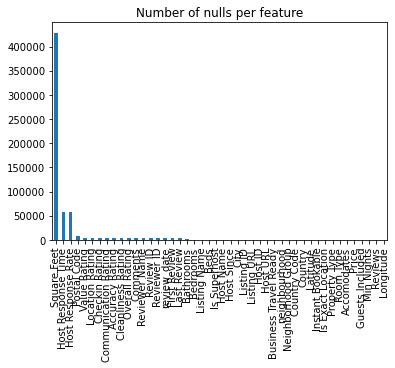

In [4]:
df.isnull().astype(int).sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Number of nulls per feature')
plt.show()

In [5]:
# Change Price_column from object to float

df['Price'].replace(to_replace=r'\,',value='' ,regex=True,inplace=True)
df['Price'] = df['Price'].astype(float)


<AxesSubplot:>

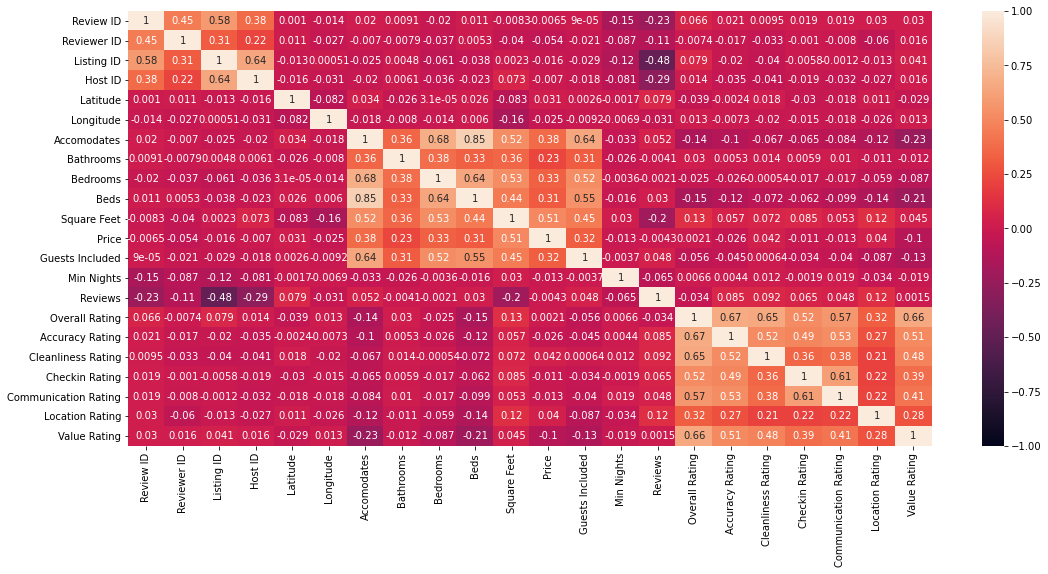

In [80]:
plt.figure(figsize=(18,8))
sns.heatmap(df.corr(),vmin=-1,vmax=1,annot_kws={'size':10},annot=True)
#df.corr()

In [7]:
print(df.City.nunique())
df.City.unique()

59


array(['Berlin', 'Berlin-Mitte', 'Berlin / Kleinmachnow',
       'Mitte/Kreuzberg', 'Berlin Friedrichshain', 'Berlin-Wedding',
       'Mitte', 'Friedrichshain', 'BerlÃ\xadn', 'Wannsee', nan,
       'Berlin (Kreuzberg)', 'Berlin Prenzlauer Berg',
       'Weissensee, Berlin', 'Woltersdorf', '10999 Berlin',
       'Berlin-Treptow', 'Kleinmachnow', 'Wilmersdorf',
       'Berlin-Friedrichshain', 'Erkner',
       'Baseler StraÃ\x9fe 91 A, 12205 Berlin ', 'Berlin, Berlin, DE',
       'SchÃ¶neberg', 'Berlin-NeukÃ¶lln', 'Hoppegarten',
       'Berlin-Zehlendorf', 'Baseler StraÃ\x9fe 91 A,12205 Berlin',
       'Berlin, Charlottenburg', '.', '*', 'Î\x92ÎµÏ\x81Î¿Î»Î¯Î½Î¿',
       'Hennigsdorf', 'Potsdam', 'berlin', 'Charlottenburg',
       'Berlin-Kreuzberg', 'Berlin-Tiergarten', 'Weissensee',
       'Kreuzberg, Berlin', 'Zeuthen', 'MÃ¼hlenbecker Land',
       'Berlin Mitte', 'Eichwalde', 'Berlino', 'Berlin - SchÃ¶neberg',
       'Ð\x91ÐµÑ\x80Ð»Ð¸Ð½', 'Berlim', 'æ\x9f\x8fæ\x9e\x97',
       'Berlin 

In [8]:
print(df['neighbourhood'].nunique())
df['neighbourhood'].unique()

93


array(['NeukÃ¶lln', 'Prenzlauer Berg', 'Mitte', 'Pankow',
       'Potsdamer Platz', 'Steglitz', 'Lichterfelde', 'Kreuzberg',
       'Friedrichshain', 'Wedding', 'SchÃ¶neberg', 'Rummelsburg',
       'Lichtenberg', 'Wilmersdorf', 'WeiÃ\x9fensee', 'Charlottenburg',
       'Halensee', 'Mariendorf', 'Tempelhof', 'Alt-Treptow', 'Tiergarten',
       'Altglienicke', 'Grunewald', 'Moabit', 'Britz', 'Kaulsdorf',
       'PlÃ¤nterwald', 'Alt-HohenschÃ¶nhausen', 'Mahlsdorf', 'Rahnsdorf',
       'Westend', 'KÃ¶penick', 'Karlshorst', 'Adlershof',
       'Friedrichshagen', 'Zehlendorf', 'Reinickendorf', 'Spandau',
       'Rudow', 'Dahlem', 'NiederschÃ¶nhausen', 'Lankwitz',
       'NiederschÃ¶neweide', 'Friedrichsfelde', 'Friedenau',
       'Hansaviertel', 'Haselhorst', 'Fennpfuhl', 'Biesdorf',
       'Wilhelmstadt', 'Heinersdorf', 'Marzahn', 'Gropiusstadt',
       'Schmargendorf', 'Nikolassee', 'Buckow', 'SchmÃ¶ckwitz', 'Tegel',
       'Waidmannslust', 'OberschÃ¶neweide', 'Frohnau',
       'Charlotten

In [9]:
print(df['Neighborhood Group'].nunique())
df['Neighborhood Group'].unique()

12


array(['NeukÃ¶lln', 'Pankow', 'Mitte', 'Friedrichshain-Kreuzberg',
       'Steglitz - Zehlendorf', 'Tempelhof - SchÃ¶neberg', 'Lichtenberg',
       'Charlottenburg-Wilm.', 'Treptow - KÃ¶penick',
       'Marzahn - Hellersdorf', 'Reinickendorf', 'Spandau'], dtype=object)

In [10]:
# Rename some of the city names and change graphic coder set for city 
df['City'] = df['City'].map(lambda x: re.sub(r'[0-9]','',str(x)))
df['City'] = df['City'].map(lambda x: re.sub(r'í','i',str(x)))
df['City'] = df['City'].map(lambda x: x.encode('latin-1').decode('utf-8'))


# Change graphic coder set Neighbourhood-column and Neighborhood Group-column
df['neighbourhood'] = df['neighbourhood'].map(lambda x: x.encode('latin-1').decode('utf-8'))
df['Neighborhood Group'] = df['Neighborhood Group'].map(lambda x: x.encode('latin-1').decode('utf-8'))

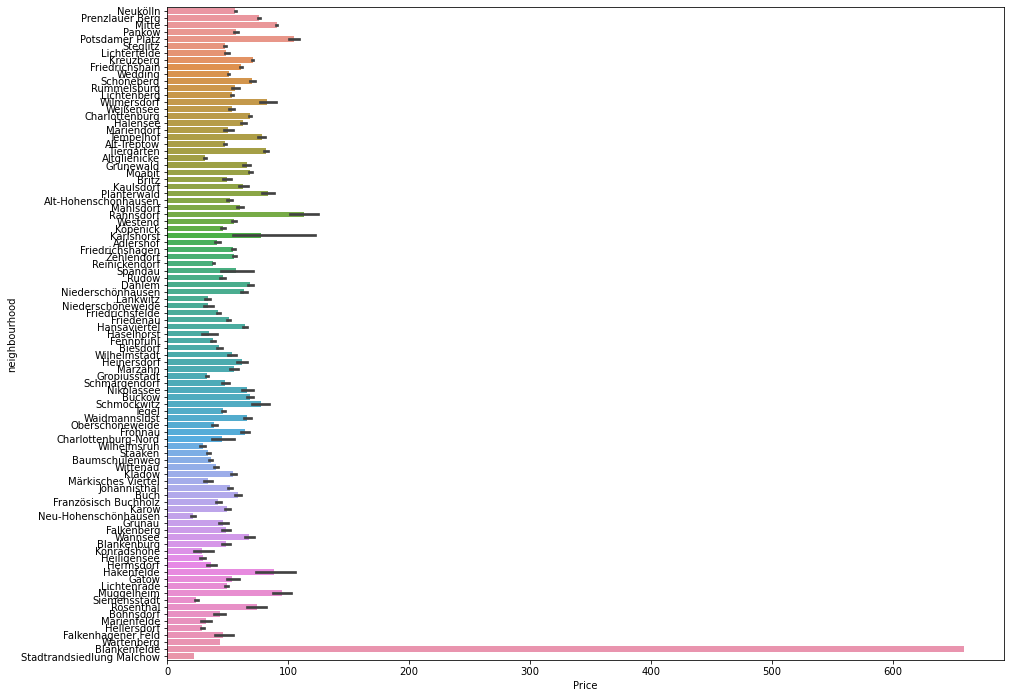

In [11]:
plt.figure(figsize=(15,12))
sns.barplot(data=df, 
            y='neighbourhood',
            x='Price')
plt.show()

In [28]:
df.select_dtypes(include=['object']).head()

,review_date,Reviewer Name,Comments,Listing URL,Listing Name,Host URL,Host Name,Host Since,Host Response Time,Host Response Rate,...,Postal Code,Country Code,Country,Is Exact Location,Property Type,Room Type,First Review,Last Review,Instant Bookable,Business Travel Ready
0,2016-01-03,Dennis,"Very nice, clean appartement! Josh was really ...",https://www.airbnb.com/rooms/10002699,Trendy and peaceful KreuzkÃ¶lln,https://www.airbnb.com/users/show/44696672,Josh,2015-09-20,NaN,NaN,...,12047,DE,Germany,t,Apartment,Entire home/apt,2016-01-03,2016-01-03,f,f
1,NaN,NaN,NaN,https://www.airbnb.com/rooms/10002922,Sehr zentrale Wohnung in Berlin,https://www.airbnb.com/users/show/45848709,Belinda,2015-10-05,NaN,NaN,...,10405,DE,Germany,f,Apartment,Entire home/apt,NaN,NaN,f,f
2,2016-01-03,Andreea,Aki is really nice and friendly. We had an ama...,https://www.airbnb.com/rooms/10006647,Very central and very quite,https://www.airbnb.com/users/show/40791092,Arkadij,2015-08-07,within a few hours,100%,...,10178,DE,Germany,t,Apartment,Private room,2016-01-03,2017-02-12,f,f
3,2016-01-05,Sasha,Aki is a very nice dude with a clean place in ...,https://www.airbnb.com/rooms/10006647,Very central and very quite,https://www.airbnb.com/users/show/40791092,Arkadij,2015-08-07,within a few hours,100%,...,10178,DE,Germany,t,Apartment,Private room,2016-01-03,2017-02-12,f,f
4,2016-03-25,Yohana,Aki's place was easy to find and located in th...,https://www.airbnb.com/rooms/10006647,Very central and very quite,https://www.airbnb.com/users/show/40791092,Arkadij,2015-08-07,within a few hours,100%,...,10178,DE,Germany,t,Apartment,Private room,2016-01-03,2017-02-12,f,f


In [29]:
df.select_dtypes(exclude=['object']).head()

,Review ID,Reviewer ID,Listing ID,Host ID,Latitude,Longitude,Accomodates,Bathrooms,Bedrooms,Beds,...,Guests Included,Min Nights,Reviews,Overall Rating,Accuracy Rating,Cleanliness Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating
0,58660447.0,14876562.0,10002699,44696672,52.49234,13.42994,4,1.0,2.0,2.0,...,1,1,1,100.0,8.0,10.0,6.0,10.0,10.0,10.0
1,NaN,NaN,10002922,45848709,52.53292,13.41502,2,1.0,1.0,1.0,...,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,58663795.0,49367757.0,10006647,40791092,52.52134,13.41866,2,1.0,1.0,1.0,...,1,1,20,92.0,9.0,8.0,9.0,10.0,10.0,9.0
3,59003619.0,46694292.0,10006647,40791092,52.52134,13.41866,2,1.0,1.0,1.0,...,1,1,20,92.0,9.0,8.0,9.0,10.0,10.0,9.0
4,66845661.0,54542819.0,10006647,40791092,52.52134,13.41866,2,1.0,1.0,1.0,...,1,1,20,92.0,9.0,8.0,9.0,10.0,10.0,9.0


In [13]:
X = df[['Host Response Time', 'Host Response Rate',
       'Is Superhost', 'neighbourhood', 'Neighborhood Group', 'City',
       'Postal Code', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Is Exact Location', 'Property Type', 'Room Type', 'Accomodates',
       'Bathrooms', 'Bedrooms', 'Beds', 'Square Feet', 'Price',
       'Guests Included', 'Min Nights', 'Reviews',]]
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(
                                     X, y, test_size=0.3, random_state=42)

In [224]:
def calc(X1,y,X2):
    
    lst_features = []
    lst_num_of_feature = []
    lst_score = []
    lst_mse = []
    lst_mae = []
    lst_num_of_feature.append(len(X1.columns)+len(X2.columns))
    X = pd.merge(X1,X2,left_index=True,right_index=True)
    X = X.dropna()
    y = y.loc[X.index]
    X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, test_size=0.3, random_state=42)
    
    lr = LinearRegression().fit(X_train,y_train)
    y_pred = lr.predict(X_test)

    lst_features.append(X.columns.values)
    lst_score.append(r2_score(y_test,y_pred))
    lst_mse.append(mean_squared_error(y_test,y_pred))
    lst_mae.append(mean_absolute_error(y_test,y_pred))
    
    
    return pd.DataFrame(zip(lst_features,lst_num_of_feature,lst_score,lst_mse,lst_mae),
                        columns=['Features','Number of features','r2 Score','mse','mae'])

In [241]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

X1 = pd.get_dummies(df[['Neighborhood Group','Is Superhost','Property Type', 'Room Type','Guests Included', 'Min Nights']])
X = df[['Bathrooms','Bedrooms', 'Beds','Square Feet']]


X = pd.merge(X,X1,left_index=True,right_index=True)
y = df['Price']

X = X.dropna()

y = y.loc[X.index]

X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, test_size=0.3, random_state=42)

lr = LinearRegression().fit(X_train,y_train)
y_pred = lr.predict(X_test)

print('Test Score:', r2_score(y_test,y_pred))

print('MAE:', mean_absolute_error(y_test,y_pred))
print('MSE:', mean_squared_error(y_test,y_pred))




#X1 = pd.get_dummies(df[['Neighborhood Group','Is Superhost','Property Type', 'Room Type','Guests Included', 'Min Nights']])
X1 = pd.get_dummies(df['Neighborhood Group'])
calc(X,y,X1)
X1 = pd.get_dummies(df[['Neighborhood Group','Is Superhost']])
calc(X,y,X1)
X1 = pd.get_dummies(df[['Neighborhood Group','neighbourhood','Property Type', 'Room Type','Guests Included', 'Min Nights']])
calc(X,y,X1)


Test Score: 0.7315173702641135
MAE: 16.620680612823364
MSE: 681.8193442068733


,Features,Number of features,r2 Score,mse,mae
0,"[Bathrooms, Bedrooms, Beds, Square Feet, Guest...",203,0.744526,648.784162,15.908137


In [237]:
#X = pd.get_dummies(df[['Neighborhood Group','neighbourhood', 'Is Superhost',
#                   'Is Exact Location', 'Property Type', 'Room Type', 'Accomodates',
#                   'Bathrooms','Guests Included', 'Min Nights', 'Bedrooms', 'Beds']],
#                   columns=['Neighborhood Group','neighbourhood', 'Is Superhost',
#                   'Is Exact Location', 'Property Type', 'Room Type', 'Accomodates',
#                   'Bathrooms','Guests Included', 'Min Nights', 'Bedrooms', 'Beds'])


In [193]:
d = df[df['Square Feet'].isnull().astype(int) == 0][['Square Feet','Property Type','Neighborhood Group']]
X2 = df[['Bathrooms','Bedrooms']]
X2 = X2.dropna()
y = df['Price']
y = y.loc[X2.index]


In [256]:
f=pd.merge(X1,y,left_index=True,right_index=True)
f = f.dropna()
f.corr()

,Guests Included,Min Nights,Neighborhood Group_Charlottenburg-Wilm.,Neighborhood Group_Friedrichshain-Kreuzberg,Neighborhood Group_Lichtenberg,Neighborhood Group_Marzahn - Hellersdorf,Neighborhood Group_Mitte,Neighborhood Group_Neukölln,Neighborhood Group_Pankow,Neighborhood Group_Reinickendorf,...,Property Type_Tipi,Property Type_Townhouse,Property Type_Train,Property Type_Treehouse,Property Type_Vacation home,Property Type_Villa,Room Type_Entire home/apt,Room Type_Private room,Room Type_Shared room,Price
Guests Included,1.000000,0.032537,0.015420,0.011217,-0.014554,-0.016542,0.022247,-0.081307,-0.098511,-0.015649,...,NaN,NaN,NaN,NaN,NaN,NaN,0.415221,-0.421490,0.023187,0.698040
Min Nights,0.032537,1.000000,0.047832,0.127131,-0.009993,-0.010137,-0.074302,0.046786,-0.090746,0.009536,...,NaN,NaN,NaN,NaN,NaN,NaN,0.183078,-0.178906,-0.027211,-0.054296
Neighborhood Group_Charlottenburg-Wilm.,0.015420,0.047832,1.000000,-0.167129,-0.020684,-0.011206,-0.140859,-0.083517,-0.158785,-0.019188,...,NaN,NaN,NaN,NaN,NaN,NaN,0.042035,-0.037841,-0.023716,-0.037351
Neighborhood Group_Friedrichshain-Kreuzberg,0.011217,0.127131,-0.167129,1.000000,-0.049290,-0.026705,-0.335663,-0.199019,-0.378382,-0.045724,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.119264,0.130301,-0.056514,-0.096364
Neighborhood Group_Lichtenberg,-0.014554,-0.009993,-0.020684,-0.049290,1.000000,-0.003305,-0.041542,-0.024631,-0.046829,-0.005659,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.021203,0.022600,-0.006994,-0.034185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Property Type_Villa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Room Type_Entire home/apt,0.415221,0.183078,0.042035,-0.119264,-0.021203,-0.021213,0.143494,-0.042237,-0.034005,-0.000423,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,-0.982930,-0.117784,0.479319
Room Type_Private room,-0.421490,-0.178906,-0.037841,0.130301,0.022600,0.022016,-0.135351,0.047670,0.006496,0.001627,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.982930,1.000000,-0.066924,-0.483058
Room Type_Shared room,0.023187,-0.027211,-0.023716,-0.056514,-0.006994,-0.003789,-0.047631,-0.028241,0.149358,-0.006488,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.117784,-0.066924,1.000000,0.007886
